In [111]:
# Classification of points (images) lying on one side of the curve - the decision boundary:
#
#
#                  (1,3)                (3,3)
#                       o-----------------o
#                      /                   \      class 0
#                     /                     \
#                    /                       \
#                   /                         \
# -----------------o  (-1,1)            (5,1)  o-------------------------------------------
#
#                              class 1

In [157]:
import time
import os.path
import pdb
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
print(tf.__version__)
# if tensorflow2 use tf.compat.v1. apart tf. (see classification2 script)
tf.compat.v1.disable_eager_execution()

2.18.0


ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


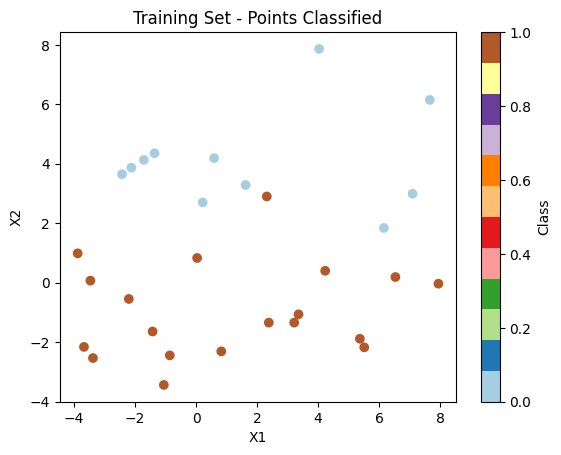

In [160]:
num_of_features = 2
num_of_epochs = 1000
num_to_show = 50

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, num_of_features])  # place for input vectors
y_ = tf.placeholder(tf.float32, shape=[None, 1])               # place for desired output of ANN

X = np.random.uniform(-4, 8, (30, 2))

def decision_boundary(x):
    if x < -1 or x > 5:
        return 1
    elif -1 <= x <= 1:
        return x + 2
    elif 1 < x <= 3:
        return 3
    elif 3 < x <= 5:
        return 6 - x

Y = np.array([decision_boundary(x[0]) for x in X])
labels = np.array([0 if x[1] > y else 1 for x, y in zip(X, Y)])

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Paired)
plt.title("Training Set - Points Classified")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(label="Class")
plt.show()

### Analytical version
(See more: https://d2l.ai/chapter_linear-regression/linear-regression.html )

In [161]:
my_tensor = tf.constant([[-1.0, 1.0],
    [ 0.0, 1.0],
    [ 1.0, 1.0],
    [ 0.0, 1.0]],dtype=float)
IW_a = tf.Variable(my_tensor)                                # 1-st level weights
b1_a = tf.Variable(tf.constant([-2, -3, -6, -1],dtype=float))      # 1-st level biases -||-

In [162]:
# output values from 1-st level:
h1_a = tf.cast(tf.greater(tf.matmul(x, tf.transpose(IW_a)) + b1_a, 0), tf.float32)
                                                             # use sharp threshold activation function like:
                                                             #
                                                             #          ---------
                                                             #          |
                                                             #   --------

In [163]:
LW21_a = tf.Variable(tf.constant([[1.0, 1.0, 1.0, 1.0]], dtype=float))  # shape [1, 4]           # 2-nd level weights values - analytical version
b2_a = tf.Variable(tf.constant([-3.5], dtype=float))

In [164]:
y_a = tf.matmul(h1_a, tf.transpose(LW21_a)) + b2_a                   # output flom ANN
y = tf.sigmoid(y_a)                   # (single value using sigmoidal act.funct in range (0,1))

### Trainable version

In [148]:
IW = tf.Variable(tf.random_normal([num_of_features, 4]),stddev=0.1)                                  # 1-st level weights
b1 = tf.Variable(tf.random_normal([4], stddev=0.1))                                   # 1-st level biases -||-

In [149]:
h1 = tf.keras.activations.relu(tf.matmul(x, IW) + b1)                       # use continuous version of activation function

In [152]:
LW21 = tf.Variable(tf.random_normal([4, 1]),stddev=0.1)           # 2-nd level weights values
b2 = tf.Variable(tf.random_normal([1], stddev=0.1))                                          # 2-nd level bias values

# LW32 = .................           # maybe 3-d layer
# b3 = ...................
y = tf.keras.activations.sigmoid(tf.matmul(h1, LW21) + b2)

In [165]:
mean_square_error = tf.reduce_mean(tf.reduce_sum((y_ - y)*(y_ - y), reduction_indices=[1]))          # MSE loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + y*tf.log(y_+0.001), reduction_indices=[1])) # full cross-entropy loss function

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(mean_square_error)   # training method, step value, loss function
                                                                              # You can choose loss function

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)


#### The training process

In [168]:
for epoch in range(num_of_epochs):
    _, current_loss = sess.run([train_step, mean_square_error], feed_dict={x: X, y_: Y})

    if epoch % num_to_show == 0:
        print(f"Epoch {epoch}, Loss: {current_loss}")
final_loss = sess.run(mean_square_error, feed_dict={x: x_train, y_: y_train})
print(f"Final Loss after {num_of_epochs} epochs: {final_loss}")

InvalidArgumentError: Graph execution error:

Detected at node 'sub_46' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
    File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
    File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
    File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    File "<ipython-input-165-bd6065f45c69>", line 1, in <cell line: 0>
Node: 'sub_46'
Incompatible shapes: [14400,1] vs. [30,1]
	 [[{{node sub_46}}]]

Original stack trace for 'sub_46':
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
  File "<ipython-input-165-bd6065f45c69>", line 1, in <cell line: 0>
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/override_binary_operator.py", line 113, in binary_op_wrapper
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/tensor_math_operator_overrides.py", line 82, in _subtract_factory
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/dispatch.py", line 1260, in op_dispatch_handler
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/math_ops.py", line 545, in subtract
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/weak_tensor_ops.py", line 142, in wrapper
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 12316, in sub
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py", line 2701, in _create_op_internal
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py", line 1196, in from_node_def


#### Drawing decision boundary

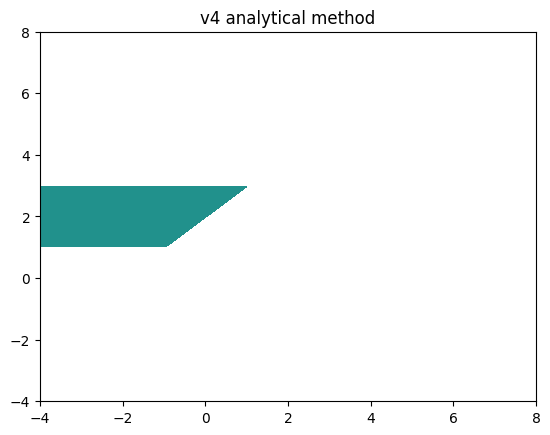

In [167]:
X1, X2 = np.meshgrid(np.linspace(-4, 8, 120), np.linspace(-4,8, 120))  # grid of points in 2D plane
P = np.stack((X1.flatten(),X2.flatten()), axis=1)                    # points formated for ANN input
Y = sess.run(y_a, feed_dict={x: P})                                    # ANN outputs for flatten grid  points
Z = np.reshape(Y,X1.shape)                                           # reshaping to shape of grid
plt.contourf(X1, X2, Z, levels=[0.5, 1.0])                           # curve for level=0.5 - a decision boundary, shaded class 1 area
plt.title('v4 analytical method')
plt.show()


#### Drawing 3D mesh

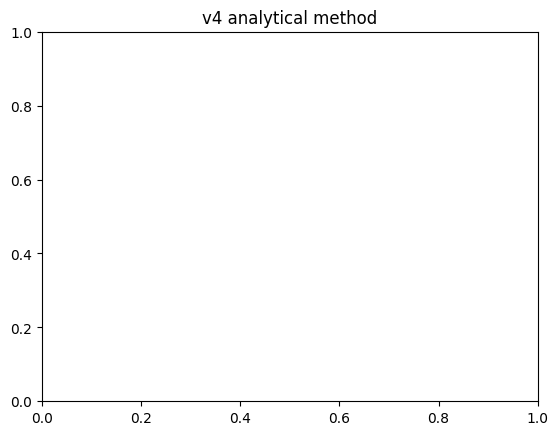

In [96]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap=cm.viridis)
plt.title('v4 analytical method')
plt.show()